<a href="https://www.kaggle.com/code/sakethyalamanchili/most-streamed-spotify-songs-2024-regression?scriptVersionId=193102333" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎧 Most Streamed Spotify Songs 2024

The dataset provides a detailed compilation of the most streamed songs on Spotify for 2024. It includes various attributes related to each track's popularity and presence across multiple music platforms, making it a valuable resource for music analysts, enthusiasts, and industry professionals. Key features include track name, artist, release date, ISRC, streaming statistics, and presence on platforms such as YouTube and TikTok.

### 1. Problem Definition

Predict the total number of streams on Spotify using supervised regression models.

### 2. Data

This dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024).

### 3. Evaluation Metric

**Mean Squared Error (MSE)** will be used as the evaluation metric. MSE is a common default metric for regression tasks because it penalizes larger errors more heavily, which can be beneficial for many applications.

### 4. Features

- **Track Name:** Name of the song.
- **Album Name:** Name of the album the song belongs to.
- **Artist:** Name of the artist(s).
- **Release Date:** Date when the song was released.
- **ISRC:** International Standard Recording Code for the song.
- **All Time Rank:** Ranking based on all-time popularity.
- **Track Score:** Score assigned to the track based on various factors.
- **Spotify Streams:** Total number of streams on Spotify.
- **Spotify Playlist Count:** Number of Spotify playlists featuring the song.
- **Spotify Playlist Reach:** Reach of the song across Spotify playlists.
- **Spotify Popularity:** Popularity score on Spotify.
- **YouTube Views:** Total views of the song’s official video on YouTube.
- **YouTube Likes:** Total likes on the official video on YouTube.
- **TikTok Posts:** Number of TikTok posts featuring the song.
- **TikTok Likes:** Total likes on TikTok posts featuring the song.
- **TikTok Views:** Total views on TikTok posts featuring the song.
- **YouTube Playlist Reach:** Reach of the song across YouTube playlists.
- **Apple Music Playlist Count:** Number of Apple Music playlists featuring the song.
- **AirPlay Spins:** Number of times the song has been played on radio stations.
- **SiriusXM Spins:** Number of times the song has been played on SiriusXM.
- **Deezer Playlist Count:** Number of Deezer playlists featuring the song.
- **Deezer Playlist Reach:** Reach of the song across Deezer playlists.
- **Amazon Playlist Count:** Number of Amazon Music playlists featuring the song.
- **Pandora Streams:** Total number of streams on Pandora.
- **Pandora Track Stations:** Number of Pandora stations featuring the song.
- **Soundcloud Streams:** Total number of streams on SoundCloud.
- **Shazam Counts:** Total number of times the song has been Shazamed.
- **TIDAL Popularity:** Popularity score on TIDAL.
- **Explicit Track:** Indicates whether the song contains explicit content.

### 5. Modeling

We will explore various models for prediction:

1. **Linear Regression**
2. **Ridge Regression (L2 Regularization)**
3. **Lasso Regression (L1 Regularization)**
4. **Elastic Net**
5. **Decision Trees**
6. **Random Forest**
7. **Gradient Boosting Regression**
8. **XGBoost Regression**
9. **LightGBM Regression**
10. **CatBoost Regression**
11. **AdaBoost Regression**
12. **Support Vector Regression (SVR)**
13. **Neural Network**

### Libraries and Frameworks

- **scikit-learn:** A comprehensive library for various regression models and machine learning algorithms in Python.
- **xgboost:** An optimized library for gradient boosting.
- **lightgbm:** A gradient boosting framework that uses a histogram-based method.
- **catboost:** A gradient boosting library with a focus on categorical features.
- **TensorFlow / Keras:** Libraries for building and training deep learning models.

In [1]:
# !pip install catboost
# sklearn version = 1.3.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import keras
import joblib
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Ensemble Methods
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Boosting Methods
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Support Vector Regression
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error

2024-08-18 17:15:54.477565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 17:15:54.477689: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 17:15:54.621593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Cleaning

In [2]:
data = pd.read_csv('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv', encoding='latin1')
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [4]:
data['Explicit Track'] = data['Explicit Track'].apply(lambda x: 'explicit' if x == 1 else 'non-explicit')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [5]:
data['Explicit Track']

0       non-explicit
1           explicit
2       non-explicit
3       non-explicit
4           explicit
            ...     
4595        explicit
4596    non-explicit
4597        explicit
4598    non-explicit
4599        explicit
Name: Explicit Track, Length: 4600, dtype: object

In [6]:
data['Release Date'] = pd.to_datetime(data['Release Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   object        
 8   Spotify Playlist Count      4530 non-null   object        
 9   Spotify Playlist Reach      4528 non-null   object        
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   object      

In [7]:
data.drop('ISRC', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   All Time Rank               4600 non-null   object        
 5   Track Score                 4600 non-null   float64       
 6   Spotify Streams             4487 non-null   object        
 7   Spotify Playlist Count      4530 non-null   object        
 8   Spotify Playlist Reach      4528 non-null   object        
 9   Spotify Popularity          3796 non-null   float64       
 10  YouTube Views               4292 non-null   object        
 11  YouTube Likes               4285 non-null   object      

In [8]:
for i in data.columns:
    if (data[i].isna().sum()/len(data))*100 >= 50:
        print(f"Dropped feature: {i}")
        data.drop(i, axis=1, inplace=True)

Dropped feature: Soundcloud Streams
Dropped feature: TIDAL Popularity


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   All Time Rank               4600 non-null   object        
 5   Track Score                 4600 non-null   float64       
 6   Spotify Streams             4487 non-null   object        
 7   Spotify Playlist Count      4530 non-null   object        
 8   Spotify Playlist Reach      4528 non-null   object        
 9   Spotify Popularity          3796 non-null   float64       
 10  YouTube Views               4292 non-null   object        
 11  YouTube Likes               4285 non-null   object      

In [10]:
(data.isna().sum()/len(data))*100

Track                          0.000000
Album Name                     0.000000
Artist                         0.108696
Release Date                   0.000000
All Time Rank                  0.000000
Track Score                    0.000000
Spotify Streams                2.456522
Spotify Playlist Count         1.521739
Spotify Playlist Reach         1.565217
Spotify Popularity            17.478261
YouTube Views                  6.695652
YouTube Likes                  6.847826
TikTok Posts                  25.500000
TikTok Likes                  21.304348
TikTok Views                  21.326087
YouTube Playlist Reach        21.934783
Apple Music Playlist Count    12.195652
AirPlay Spins                 10.826087
SiriusXM Spins                46.152174
Deezer Playlist Count         20.021739
Deezer Playlist Reach         20.173913
Amazon Playlist Count         22.934783
Pandora Streams               24.043478
Pandora Track Stations        27.565217
Shazam Counts                 12.543478


In [11]:
(data.isna().sum(axis=1) / data.shape[1])*100

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        7.692308
          ...    
4595     7.692308
4596    19.230769
4597     3.846154
4598    15.384615
4599     3.846154
Length: 4600, dtype: float64

In [12]:
for i in data.index:
    if (data.loc[i].isna().sum()/data.shape[1])*100 >= 50:
        print(f"Dropped row: {i}")
        data.drop(i, axis=0, inplace=True)

Dropped row: 8
Dropped row: 11
Dropped row: 22
Dropped row: 24
Dropped row: 29
Dropped row: 30
Dropped row: 47
Dropped row: 57
Dropped row: 58
Dropped row: 60
Dropped row: 64
Dropped row: 71
Dropped row: 117
Dropped row: 125
Dropped row: 141
Dropped row: 154
Dropped row: 236
Dropped row: 254
Dropped row: 270
Dropped row: 276
Dropped row: 285
Dropped row: 286
Dropped row: 291
Dropped row: 310
Dropped row: 311
Dropped row: 335
Dropped row: 386
Dropped row: 391
Dropped row: 400
Dropped row: 413
Dropped row: 468
Dropped row: 480
Dropped row: 482
Dropped row: 529
Dropped row: 539
Dropped row: 544
Dropped row: 553
Dropped row: 557
Dropped row: 560
Dropped row: 587
Dropped row: 595
Dropped row: 619
Dropped row: 621
Dropped row: 624
Dropped row: 644
Dropped row: 682
Dropped row: 688
Dropped row: 703
Dropped row: 713
Dropped row: 758
Dropped row: 805
Dropped row: 820
Dropped row: 862
Dropped row: 870
Dropped row: 879
Dropped row: 911
Dropped row: 930
Dropped row: 935
Dropped row: 979
Dropped ro

In [13]:
data

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,"390,470,936","30,716","196,631,588",92.0,...,210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",non-explicit
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,"323,703,884","28,113","174,597,137",92.0,...,188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",explicit
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,"601,309,283","54,331","211,607,669",92.0,...,190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",non-explicit
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,...,394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",non-explicit
4,Houdini,Houdini,Eminem,2024-05-31,5,423.3,"107,034,922","7,223","151,469,874",88.0,...,182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","457,017",explicit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,...,3.0,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","656,337",explicit
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,"193,590",non-explicit
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,...,19.0,204,NaN,1.0,74,6.0,"84,426,740","28,999","1,135,998",explicit
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,...,1.0,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,"448,292",non-explicit


In [14]:
(data.isna().sum()/len(data))*100

Track                          0.000000
Album Name                     0.000000
Artist                         0.000000
Release Date                   0.000000
All Time Rank                  0.000000
Track Score                    0.000000
Spotify Streams                0.552359
Spotify Playlist Count         0.023015
Spotify Playlist Reach         0.023015
Spotify Popularity            13.141542
YouTube Views                  3.360184
YouTube Likes                  3.498274
TikTok Posts                  21.518987
TikTok Likes                  17.123130
TikTok Views                  17.146145
YouTube Playlist Reach        18.273878
Apple Music Playlist Count     7.640967
AirPlay Spins                  6.697353
SiriusXM Spins                43.014960
Deezer Playlist Count         15.443038
Deezer Playlist Reach         15.604143
Amazon Playlist Count         18.665132
Pandora Streams               20.069045
Pandora Track Stations        23.797468
Shazam Counts                  8.722670


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4345 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4345 non-null   object        
 1   Album Name                  4345 non-null   object        
 2   Artist                      4345 non-null   object        
 3   Release Date                4345 non-null   datetime64[ns]
 4   All Time Rank               4345 non-null   object        
 5   Track Score                 4345 non-null   float64       
 6   Spotify Streams             4321 non-null   object        
 7   Spotify Playlist Count      4344 non-null   object        
 8   Spotify Playlist Reach      4344 non-null   object        
 9   Spotify Popularity          3774 non-null   float64       
 10  YouTube Views               4199 non-null   object        
 11  YouTube Likes               4193 non-null   object        
 1

We can drop the track from the dataset, as track names can be different and predicting the Spotify Streams with track names is not possible. However, album names are still useful.

In [16]:
data.drop(columns=['Track'], axis=1, inplace=True)
data

,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754",...,210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",non-explicit
1,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040",...,188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",explicit
2,I like the way you kiss me,Artemas,2024-03-19,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116",...,190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",non-explicit
3,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899",...,394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",non-explicit
4,Houdini,Eminem,2024-05-31,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957",...,182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","457,017",explicit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,$uicideboy$,2017-09-05,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,"149,247,747",...,3.0,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","656,337",explicit
4596,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,"943,920,245",...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,"193,590",non-explicit
4597,My Turn,Lil Baby,2020-02-28,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,"201,027,333",...,19.0,204,NaN,1.0,74,6.0,"84,426,740","28,999","1,135,998",explicit
4598,November Top 10 Songs,Arijit Singh,2016-11-08,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159",...,1.0,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,"448,292",non-explicit


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4345 entries, 0 to 4599
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Album Name                  4345 non-null   object        
 1   Artist                      4345 non-null   object        
 2   Release Date                4345 non-null   datetime64[ns]
 3   All Time Rank               4345 non-null   object        
 4   Track Score                 4345 non-null   float64       
 5   Spotify Streams             4321 non-null   object        
 6   Spotify Playlist Count      4344 non-null   object        
 7   Spotify Playlist Reach      4344 non-null   object        
 8   Spotify Popularity          3774 non-null   float64       
 9   YouTube Views               4199 non-null   object        
 10  YouTube Likes               4193 non-null   object        
 11  TikTok Posts                3410 non-null   object        
 1

In [18]:
data['year'] = data['Release Date'].dt.year
data['month'] = data['Release Date'].dt.month
data['day'] = data['Release Date'].dt.day
data['day_of_week'] = data['Release Date'].dt.dayofweek
data['quarter'] = data['Release Date'].dt.quarter
data.drop('Release Date', axis=1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4345 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Album Name                  4345 non-null   object 
 1   Artist                      4345 non-null   object 
 2   All Time Rank               4345 non-null   object 
 3   Track Score                 4345 non-null   float64
 4   Spotify Streams             4321 non-null   object 
 5   Spotify Playlist Count      4344 non-null   object 
 6   Spotify Playlist Reach      4344 non-null   object 
 7   Spotify Popularity          3774 non-null   float64
 8   YouTube Views               4199 non-null   object 
 9   YouTube Likes               4193 non-null   object 
 10  TikTok Posts                3410 non-null   object 
 11  TikTok Likes                3601 non-null   object 
 12  TikTok Views                3600 non-null   object 
 13  YouTube Playlist Reach      3551 non-n

In [20]:
data['Artist']

0        Tommy Richman
1       Kendrick Lamar
2              Artemas
3          Miley Cyrus
4               Eminem
             ...      
4595       $uicideboy$
4596        Atif Aslam
4597          Lil Baby
4598      Arijit Singh
4599         Arcï¿½ï¿½
Name: Artist, Length: 4345, dtype: object

In [21]:
X = data.drop('Spotify Streams', axis=1)
y = data['Spotify Streams']

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                    test_size=0.21, 
                                                    random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, 
                                                    test_size=0.1, 
                                                    random_state=42)

# Training Data = 79% - Validation Data = 20% - Testing Data = 1%

X_train.shape, X_valid.shape, X_test.shape, 
y_train.shape, y_valid.shape, y_test.shape

((3432,), (821,), (92,))

In [23]:
le = LabelEncoder()
X_train['Explicit Track'] = le.fit_transform(X_train['Explicit Track'])

In [24]:
X_train['Explicit Track']

2773    1
4355    1
4584    1
4274    0
199     0
       ..
3638    0
499     1
3268    1
3985    0
916     1
Name: Explicit Track, Length: 3432, dtype: int64

In [25]:
def labelencode_explicitrack(encoder, data):
    data['Explicit Track'] = encoder.transform(data['Explicit Track'])

In [26]:
def convert_to_numeric(data):
    for col in data.columns:
        # Check if the column is of object type (potentially containing non-numeric values)
        if col not in ['Album Name', 'Artist'] and data[col].dtype == 'object':
            # Remove commas and other non-numeric characters
            data[col] = data[col].str.replace(',', '', regex=False)
            # Convert to numeric, forcing errors to NaN (useful if there are still non-numeric values)
            data[col] = pd.to_numeric(data[col], errors='coerce')


In [27]:
convert_to_numeric(X_train)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3432 entries, 2773 to 916
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Album Name                  3432 non-null   object 
 1   Artist                      3432 non-null   object 
 2   All Time Rank               3432 non-null   int64  
 3   Track Score                 3432 non-null   float64
 4   Spotify Playlist Count      3431 non-null   float64
 5   Spotify Playlist Reach      3431 non-null   float64
 6   Spotify Popularity          2978 non-null   float64
 7   YouTube Views               3323 non-null   float64
 8   YouTube Likes               3320 non-null   float64
 9   TikTok Posts                2717 non-null   float64
 10  TikTok Likes                2858 non-null   float64
 11  TikTok Views                2857 non-null   float64
 12  YouTube Playlist Reach      2817 non-null   float64
 13  Apple Music Playlist Count  3178 non

In [29]:
X_train

,Album Name,Artist,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter
2773,Admirin' You (feat. Preston Pablo),Karan Aujla,2760,26.7,11146.0,3310108.0,63.0,1.023631e+08,1045313.0,NaN,...,19.0,25772.0,17.0,157502.0,1,2023,8,1,1,3
4355,Fall in Love with You. - Single,Montell Fish,4320,20.2,67188.0,17442127.0,74.0,2.702763e+07,793123.0,233511.0,...,20.0,2613145.0,3132.0,611661.0,1,2021,11,5,4,4
4584,Morado,J Balvin,4553,19.5,65140.0,16620315.0,58.0,2.570453e+08,2076627.0,151922.0,...,18.0,58365539.0,8468.0,1227531.0,1,2020,1,9,3,1
4274,Sundress,A$AP Rocky,4256,20.5,153078.0,26248264.0,80.0,4.778061e+07,656845.0,14062.0,...,12.0,1764060.0,6670.0,903716.0,0,2018,11,20,1,4
199,Without Me,Halsey,200,107.4,198888.0,69311277.0,75.0,2.018090e+09,20528541.0,3897257.0,...,89.0,562568504.0,360183.0,14816076.0,0,2018,10,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,Para Mi Ex,Myke Towers,3619,22.6,57909.0,7781405.0,62.0,3.371232e+08,1592106.0,38300.0,...,4.0,12008035.0,2206.0,466416.0,0,2020,12,15,1,4
499,BORN PINK,BLACKPINK,497,69.0,39852.0,17682503.0,67.0,6.337817e+08,11421404.0,844032.0,...,29.0,2834793.0,6453.0,909449.0,1,2022,9,16,4,3
3268,Marï¿½,HWASA,3258,24.1,31034.0,6694945.0,63.0,4.895183e+08,8770696.0,854500.0,...,20.0,2248413.0,3097.0,126970.0,1,2020,6,29,0,2
3985,Straightenin,Migos,3968,21.4,61959.0,9905843.0,51.0,1.583415e+08,1541456.0,22945.0,...,11.0,36411677.0,7544.0,1039383.0,0,2021,5,14,4,2


In [30]:
def mean_median_conversion(data):
    for feature in data.columns:
        # Exclude non-numeric features and check for missing values
        if feature not in ['Album Name', 'Artist', 'Explicit Track'] and data[feature].isna().sum() > 0:
            # Check skewness to decide between mean and median
            skewness = data[feature].skew()
            if skewness > 1 or skewness < -1:
                # Use median for highly skewed distributions
                data[feature].fillna(data[feature].median(), inplace=True)
            else:
                # Use mean for approximately normally distributed data
                data[feature].fillna(data[feature].mean(), inplace=True)

In [31]:
mean_median_conversion(X_train)

In [32]:
y_train.isna().sum()

17

In [33]:
y_train = pd.DataFrame(y_train, columns=['Spotify Streams'])
y_train

,Spotify Streams
2773,"97,989,585"
4355,"342,872,540"
4584,"485,274,842"
4274,"595,930,584"
199,"2,042,792,456"
...,...
3638,"243,931,915"
499,"654,818,451"
3268,"280,901,994"
3985,"135,665,686"


In [34]:
convert_to_numeric(y_train)
mean_median_conversion(y_train)

In [35]:
y_train.isna().sum()

Spotify Streams    0
dtype: int64

In [36]:
X_train.isna().sum()

Album Name                    0
Artist                        0
All Time Rank                 0
Track Score                   0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
year                          0
month                         0
day                           0
day_of_week                   0
quarter                       0
dtype: int64

In [37]:
y_train

,Spotify Streams
2773,9.798958e+07
4355,3.428725e+08
4584,4.852748e+08
4274,5.959306e+08
199,2.042792e+09
...,...
3638,2.439319e+08
499,6.548185e+08
3268,2.809020e+08
3985,1.356657e+08


In [38]:
X_train

,Album Name,Artist,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter
2773,Admirin' You (feat. Preston Pablo),Karan Aujla,2760,26.7,11146.0,3310108.0,63.0,1.023631e+08,1045313.0,173337.0,...,19.0,25772.0,17.0,157502.0,1,2023,8,1,1,3
4355,Fall in Love with You. - Single,Montell Fish,4320,20.2,67188.0,17442127.0,74.0,2.702763e+07,793123.0,233511.0,...,20.0,2613145.0,3132.0,611661.0,1,2021,11,5,4,4
4584,Morado,J Balvin,4553,19.5,65140.0,16620315.0,58.0,2.570453e+08,2076627.0,151922.0,...,18.0,58365539.0,8468.0,1227531.0,1,2020,1,9,3,1
4274,Sundress,A$AP Rocky,4256,20.5,153078.0,26248264.0,80.0,4.778061e+07,656845.0,14062.0,...,12.0,1764060.0,6670.0,903716.0,0,2018,11,20,1,4
199,Without Me,Halsey,200,107.4,198888.0,69311277.0,75.0,2.018090e+09,20528541.0,3897257.0,...,89.0,562568504.0,360183.0,14816076.0,0,2018,10,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,Para Mi Ex,Myke Towers,3619,22.6,57909.0,7781405.0,62.0,3.371232e+08,1592106.0,38300.0,...,4.0,12008035.0,2206.0,466416.0,0,2020,12,15,1,4
499,BORN PINK,BLACKPINK,497,69.0,39852.0,17682503.0,67.0,6.337817e+08,11421404.0,844032.0,...,29.0,2834793.0,6453.0,909449.0,1,2022,9,16,4,3
3268,Marï¿½,HWASA,3258,24.1,31034.0,6694945.0,63.0,4.895183e+08,8770696.0,854500.0,...,20.0,2248413.0,3097.0,126970.0,1,2020,6,29,0,2
3985,Straightenin,Migos,3968,21.4,61959.0,9905843.0,51.0,1.583415e+08,1541456.0,22945.0,...,11.0,36411677.0,7544.0,1039383.0,0,2021,5,14,4,2


In [39]:
y_train.isna().sum()

Spotify Streams    0
dtype: int64

In [40]:
# Initialize TargetEncoder
encoder = ce.TargetEncoder(cols=['Album Name', 'Artist'])

# Fit and transform the encoder
X_train_encoded = encoder.fit_transform(X_train[['Album Name', 'Artist']], y_train)

# Drop original columns and concatenate encoded features
X_train_dropped = X_train.drop(columns=['Album Name', 'Artist'])
X_train_final = pd.concat([X_train_dropped, X_train_encoded], axis=1)

print("Final DataFrame with Target Encoding:")
X_train_final

Final DataFrame with Target Encoding:


,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
2773,2760,26.7,11146.0,3310108.0,63.0,1.023631e+08,1045313.0,173337.0,25432691.0,2.545711e+08,...,17.0,157502.0,1,2023,8,1,1,3,3.919219e+08,3.699325e+08
4355,4320,20.2,67188.0,17442127.0,74.0,2.702763e+07,793123.0,233511.0,123098301.0,8.504394e+08,...,3132.0,611661.0,1,2021,11,5,4,4,4.237832e+08,4.194144e+08
4584,4553,19.5,65140.0,16620315.0,58.0,2.570453e+08,2076627.0,151922.0,9099573.0,9.618851e+07,...,8468.0,1227531.0,1,2020,1,9,3,1,4.423110e+08,4.891412e+08
4274,4256,20.5,153078.0,26248264.0,80.0,4.778061e+07,656845.0,14062.0,4253139.0,3.709417e+07,...,6670.0,903716.0,0,2018,11,20,1,4,4.567082e+08,4.817142e+08
199,200,107.4,198888.0,69311277.0,75.0,2.018090e+09,20528541.0,3897257.0,208270183.0,2.216716e+09,...,360183.0,14816076.0,0,2018,10,4,3,4,6.449572e+08,5.351779e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,3619,22.6,57909.0,7781405.0,62.0,3.371232e+08,1592106.0,38300.0,13056090.0,1.160382e+08,...,2206.0,466416.0,0,2020,12,15,1,4,4.109102e+08,4.244585e+08
499,497,69.0,39852.0,17682503.0,67.0,6.337817e+08,11421404.0,844032.0,374048198.0,3.365539e+09,...,6453.0,909449.0,1,2022,9,16,4,3,4.458218e+08,4.731868e+08
3268,3258,24.1,31034.0,6694945.0,63.0,4.895183e+08,8770696.0,854500.0,100199461.0,9.485941e+08,...,3097.0,126970.0,1,2020,6,29,0,2,4.157203e+08,4.157203e+08
3985,3968,21.4,61959.0,9905843.0,51.0,1.583415e+08,1541456.0,22945.0,8690617.0,9.808510e+07,...,7544.0,1039383.0,0,2021,5,14,4,2,3.968239e+08,4.742557e+08


In [41]:
def apply_transform_encoding(df, encoder, cols=['Album Name', 'Artist']):
    """
    Applies the previously fitted target encoder to the specified categorical columns
    and returns the DataFrame with the encoded columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to be transformed.
    encoder (ce.TargetEncoder): The fitted TargetEncoder object.
    cols (list): The list of categorical columns to encode.

    Returns:
    pd.DataFrame: The DataFrame with the target encoded columns.
    """
    # Transform the specified columns using the fitted encoder
    encoded_cols = encoder.transform(df[cols])
    
    # Drop the original categorical columns
    df_dropped = df.drop(columns=cols)
    
    # Concatenate the encoded columns with the rest of the DataFrame
    df_final = pd.concat([df_dropped, encoded_cols], axis=1)
    
    return df_final


In [42]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3432 entries, 2773 to 916
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   All Time Rank               3432 non-null   int64  
 1   Track Score                 3432 non-null   float64
 2   Spotify Playlist Count      3432 non-null   float64
 3   Spotify Playlist Reach      3432 non-null   float64
 4   Spotify Popularity          3432 non-null   float64
 5   YouTube Views               3432 non-null   float64
 6   YouTube Likes               3432 non-null   float64
 7   TikTok Posts                3432 non-null   float64
 8   TikTok Likes                3432 non-null   float64
 9   TikTok Views                3432 non-null   float64
 10  YouTube Playlist Reach      3432 non-null   float64
 11  Apple Music Playlist Count  3432 non-null   float64
 12  AirPlay Spins               3432 non-null   float64
 13  SiriusXM Spins              3432 non

In [43]:
for index, feature in enumerate(X_train_final.columns):
    print(feature)

All Time Rank
Track Score
Spotify Playlist Count
Spotify Playlist Reach
Spotify Popularity
YouTube Views
YouTube Likes
TikTok Posts
TikTok Likes
TikTok Views
YouTube Playlist Reach
Apple Music Playlist Count
AirPlay Spins
SiriusXM Spins
Deezer Playlist Count
Deezer Playlist Reach
Amazon Playlist Count
Pandora Streams
Pandora Track Stations
Shazam Counts
Explicit Track
year
month
day
day_of_week
quarter
Album Name
Artist


## Exploratory data analysis (EDA)

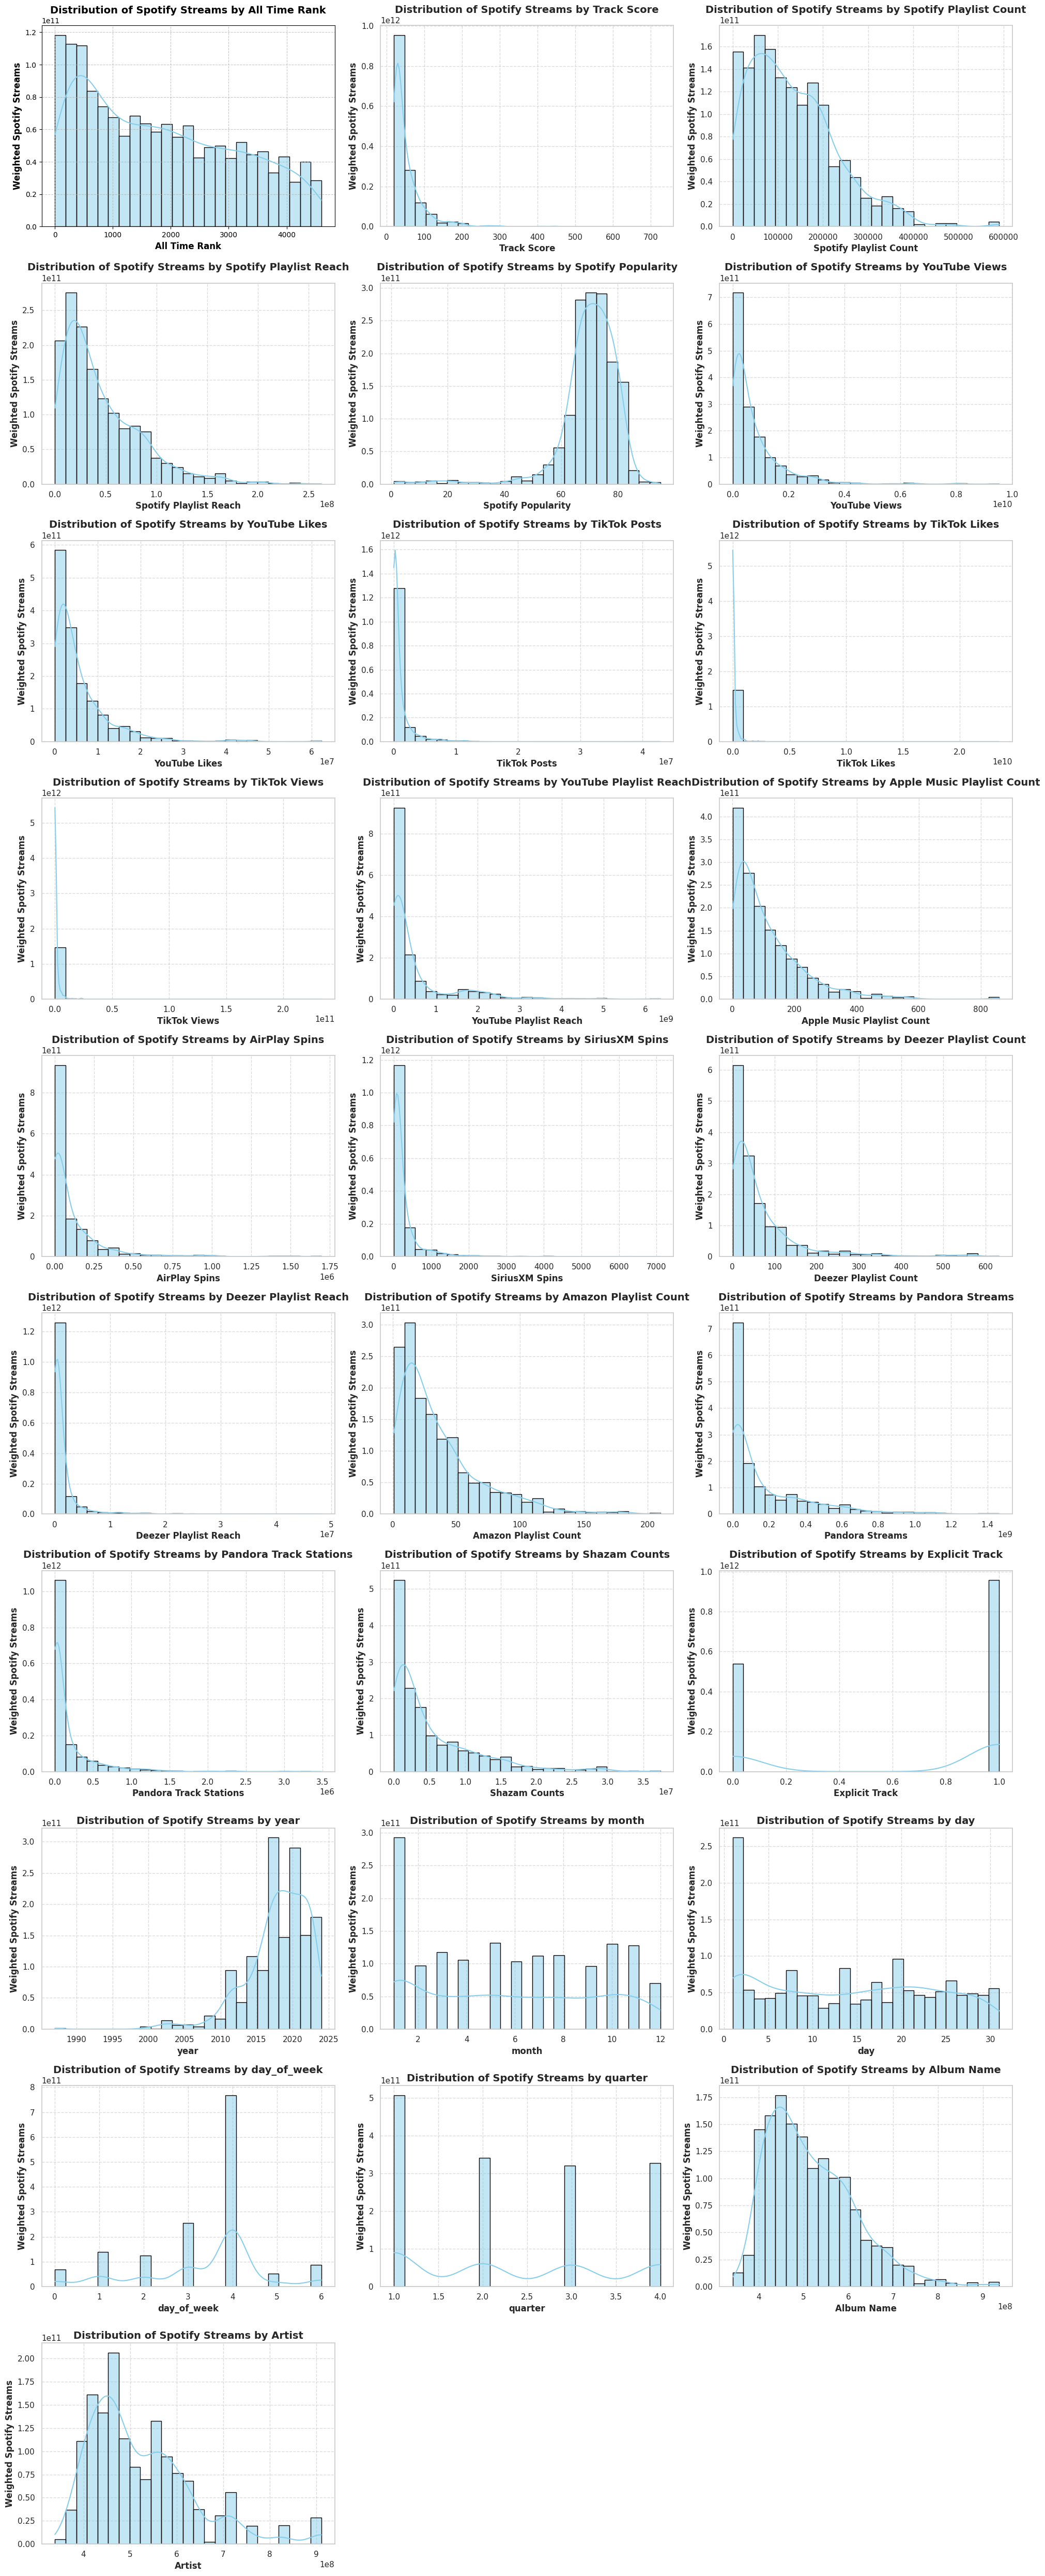

In [44]:
# Define numerical features
numerical_features = X_train_final.columns  # Assuming all columns are numerical for this example

# Define the number of columns and calculate the number of rows needed
cols = 3
rows = int(np.ceil(len(numerical_features) / cols))

plt.figure(figsize=(20, 5 * rows))  # Adjust figure size to fit the subplots

# Loop through each feature and create a subplot
for index, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, index + 1)  # Create subplot with correct indexing
    sns.set(style='whitegrid')
    sns.histplot(data=X_train_final, x=feature, weights=y_train['Spotify Streams'],
                bins=25, edgecolor='black', color='skyblue', kde=True)  # Increased bins for granularity
    plt.title(f"Distribution of Spotify Streams by {feature}", fontsize=14, fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=12, fontweight='bold')
    plt.ylabel('Weighted Spotify Streams', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
X_train_final

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
2773,2760,26.7,11146.0,3310108.0,63.0,1.023631e+08,1045313.0,173337.0,25432691.0,2.545711e+08,...,17.0,157502.0,1,2023,8,1,1,3,3.919219e+08,3.699325e+08
4355,4320,20.2,67188.0,17442127.0,74.0,2.702763e+07,793123.0,233511.0,123098301.0,8.504394e+08,...,3132.0,611661.0,1,2021,11,5,4,4,4.237832e+08,4.194144e+08
4584,4553,19.5,65140.0,16620315.0,58.0,2.570453e+08,2076627.0,151922.0,9099573.0,9.618851e+07,...,8468.0,1227531.0,1,2020,1,9,3,1,4.423110e+08,4.891412e+08
4274,4256,20.5,153078.0,26248264.0,80.0,4.778061e+07,656845.0,14062.0,4253139.0,3.709417e+07,...,6670.0,903716.0,0,2018,11,20,1,4,4.567082e+08,4.817142e+08
199,200,107.4,198888.0,69311277.0,75.0,2.018090e+09,20528541.0,3897257.0,208270183.0,2.216716e+09,...,360183.0,14816076.0,0,2018,10,4,3,4,6.449572e+08,5.351779e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,3619,22.6,57909.0,7781405.0,62.0,3.371232e+08,1592106.0,38300.0,13056090.0,1.160382e+08,...,2206.0,466416.0,0,2020,12,15,1,4,4.109102e+08,4.244585e+08
499,497,69.0,39852.0,17682503.0,67.0,6.337817e+08,11421404.0,844032.0,374048198.0,3.365539e+09,...,6453.0,909449.0,1,2022,9,16,4,3,4.458218e+08,4.731868e+08
3268,3258,24.1,31034.0,6694945.0,63.0,4.895183e+08,8770696.0,854500.0,100199461.0,9.485941e+08,...,3097.0,126970.0,1,2020,6,29,0,2,4.157203e+08,4.157203e+08
3985,3968,21.4,61959.0,9905843.0,51.0,1.583415e+08,1541456.0,22945.0,8690617.0,9.808510e+07,...,7544.0,1039383.0,0,2021,5,14,4,2,3.968239e+08,4.742557e+08


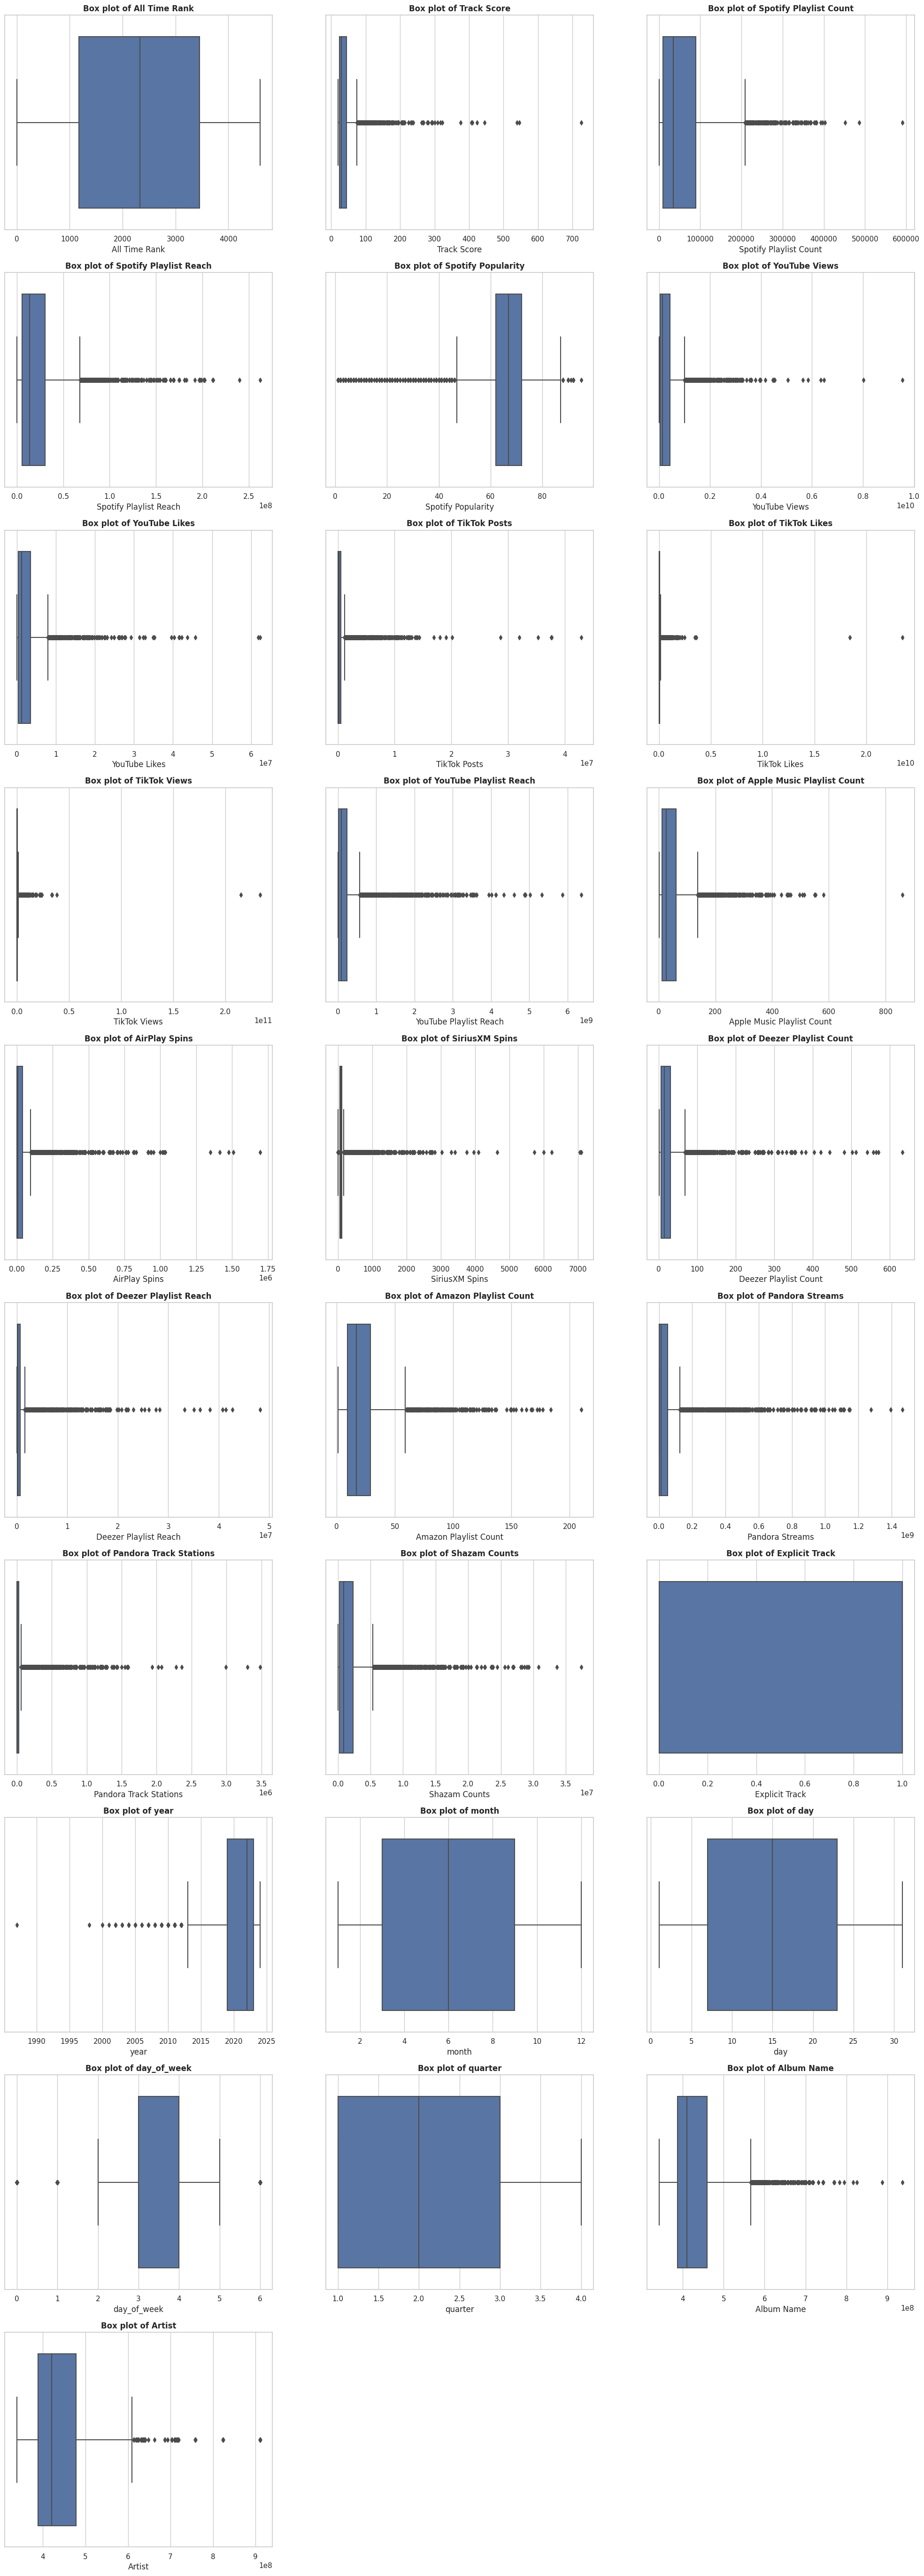

In [46]:
plt.figure(figsize=(25, 7*rows))

for index, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, index+1)
    sns.boxplot(x=X_train_final[feature])
    plt.title(f"Box plot of {feature}", fontsize=12, fontweight='bold')

In [47]:
outlier_features = ['Track Score', 'Spotify Playlist Count', 
                    'Spotify Playlist Reach', 'Spotify Popularity', 
                    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 
                    'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 
                    'Apple Music Playlist Count', 'AirPlay Spins', 
                    'SiriusXM Spins', 'Deezer Playlist Count', 
                    'Deezer Playlist Reach', 'Amazon Playlist Count', 
                    'Pandora Streams', 'Pandora Track Stations', 
                    'Shazam Counts']

## Capping Outliers

In [48]:
def cap_outliers(df, features):
    """
    Caps the outliers in the specified features of the DataFrame by replacing
    values beyond the upper and lower limits with the respective limit values.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    features (list): The list of feature names where outliers need to be capped.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers capped.
    """
    for feature in features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        # Interquartile Range (IQR)
        IQR = Q3 - Q1
        # Calculate the upper and lower limits
        UPPER_LIMIT = Q3 + (1.5 * IQR)
        LOWER_LIMIT = Q1 - (1.5 * IQR)

        # Cap the outliers
        df.loc[(df[feature] > UPPER_LIMIT), feature] = UPPER_LIMIT
        df.loc[(df[feature] < LOWER_LIMIT), feature] = LOWER_LIMIT

    return df


In [49]:
X_train_final = cap_outliers(X_train_final, outlier_features)

<Axes: xlabel='Spotify Streams'>

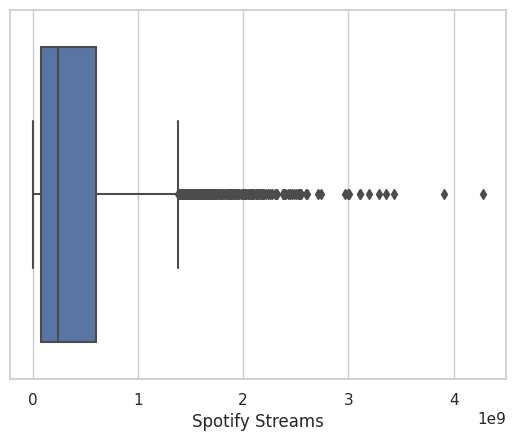

In [50]:
sns.boxplot(x=y_train['Spotify Streams'])

<Axes: xlabel='Spotify Streams'>

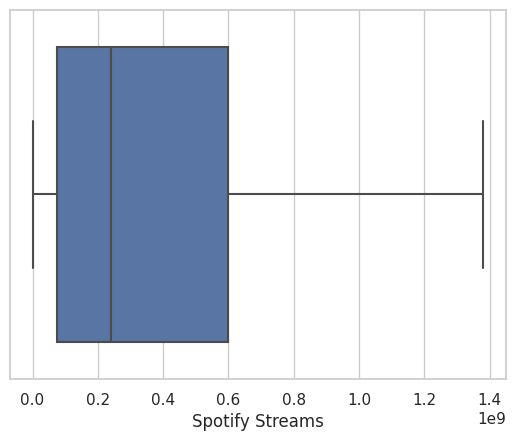

In [51]:
y_train = cap_outliers(y_train, features=['Spotify Streams'])
sns.boxplot(x=y_train['Spotify Streams'])

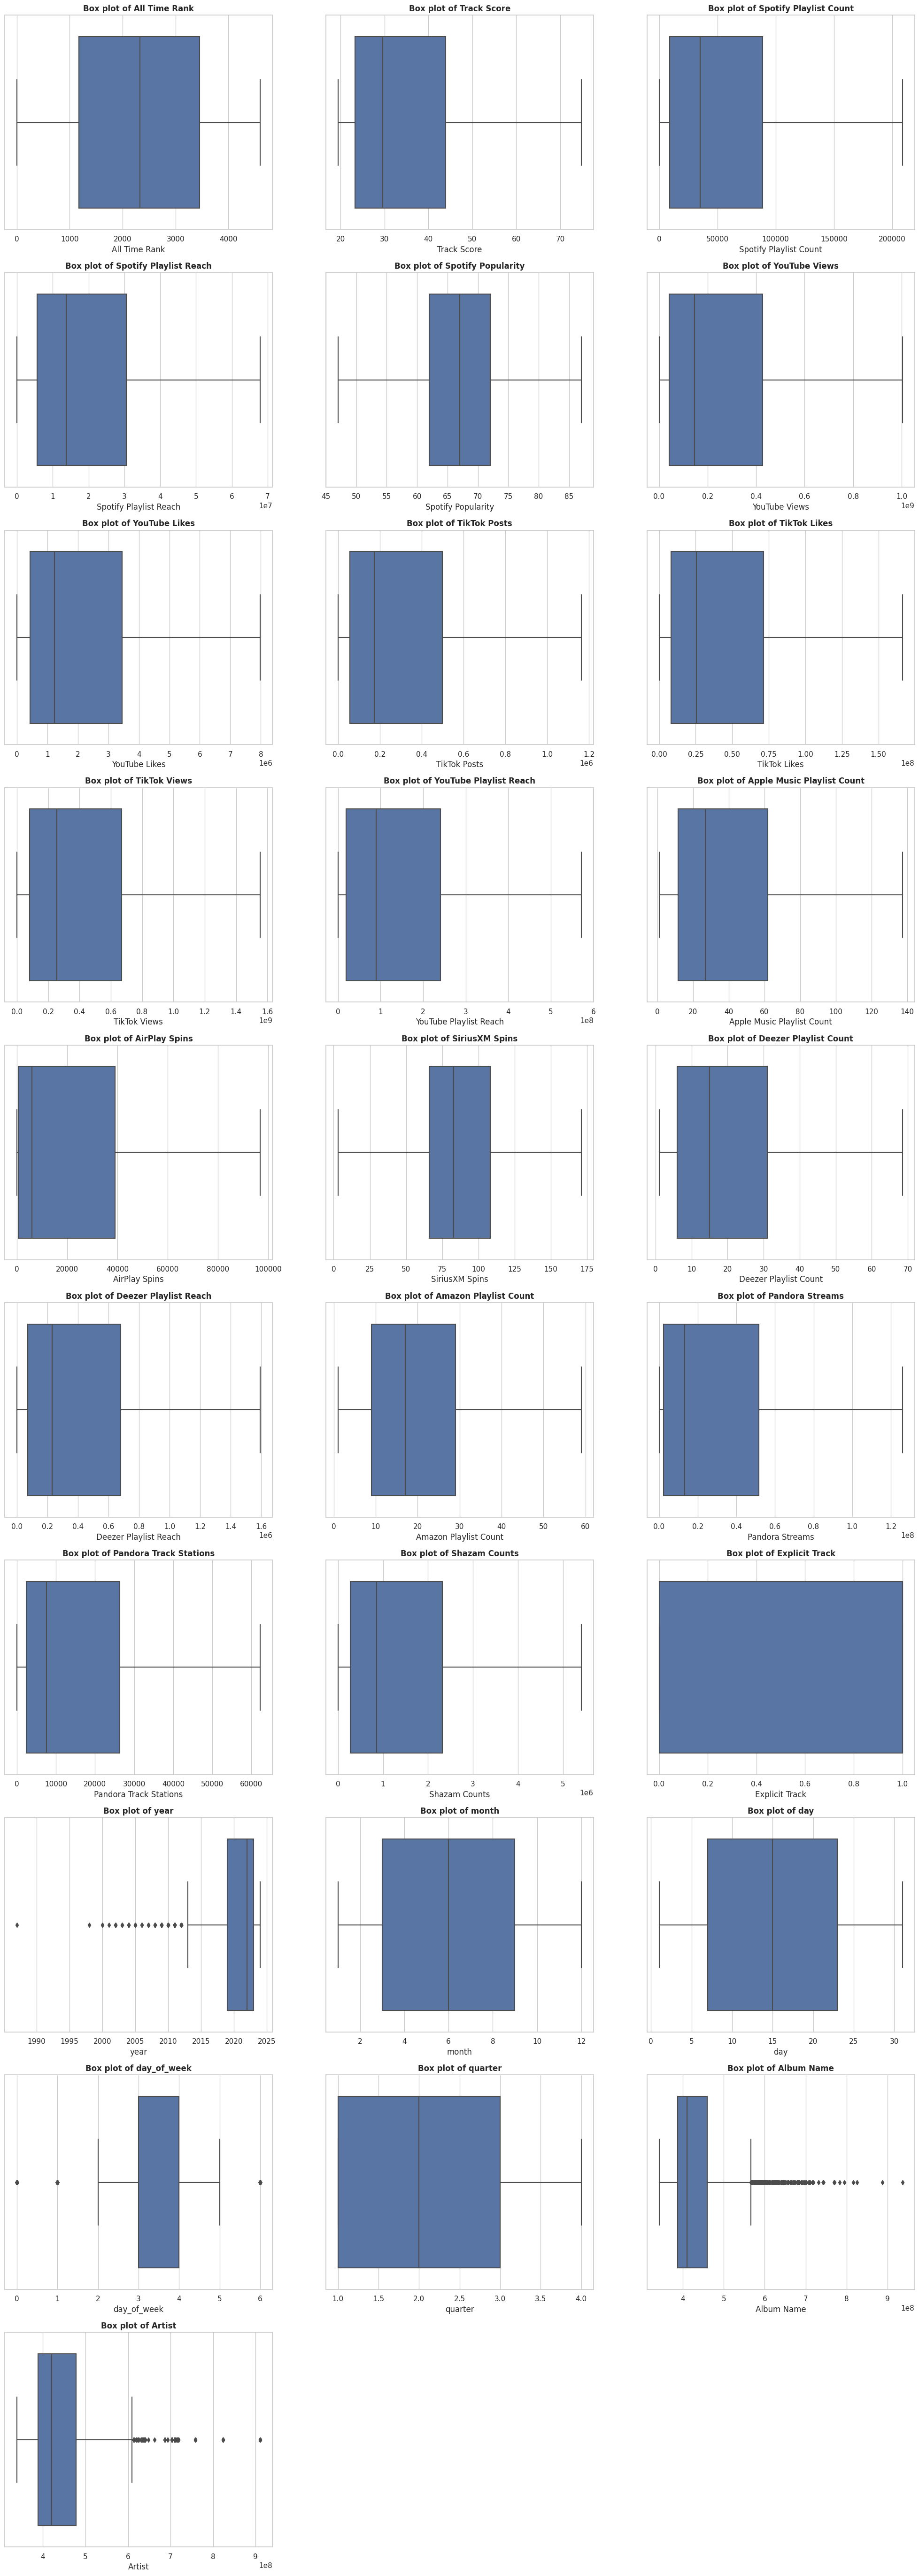

In [52]:
plt.figure(figsize=(25, 7*rows))

for index, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, index+1)
    sns.boxplot(x=X_train_final[feature])
    plt.title(f"Box plot of {feature}", fontsize=12, fontweight='bold')

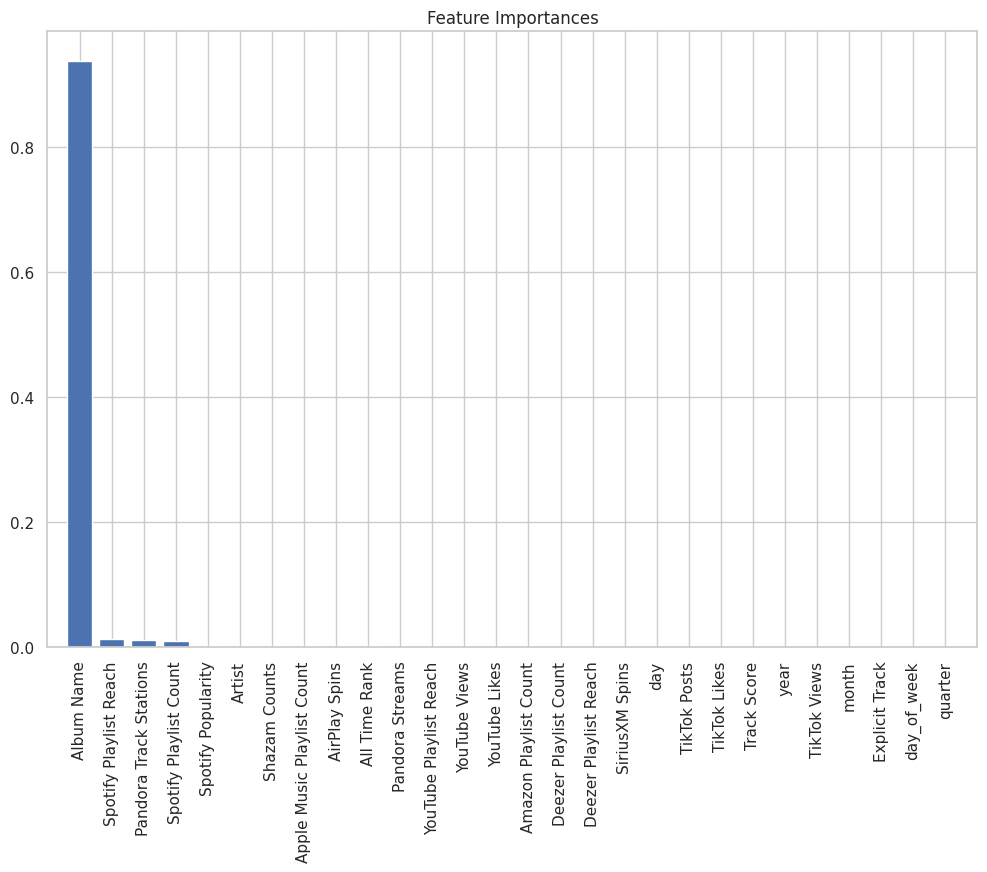

In [53]:
# Fit a RandomForest model
model = RandomForestRegressor()
model.fit(X_train_final, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train_final.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_final.shape[1]), X_train_final.columns[indices], rotation=90)
plt.xlim([-1, X_train_final.shape[1]])
plt.show()


In [54]:
labelencode_explicitrack(le, X_valid)
convert_to_numeric(X_valid)
mean_median_conversion(X_valid)

In [55]:
y_valid = pd.DataFrame(y_valid, columns=['Spotify Streams'])
y_valid

,Spotify Streams
3826,"339,954,855"
2634,"83,966,111"
196,"207,093,873"
1883,"11,576,361"
4326,"65,098,757"
...,...
3120,"15,832,405"
168,"630,373,315"
1516,"199,846,893"
2407,"559,708,419"


In [56]:
convert_to_numeric(y_valid)
mean_median_conversion(y_valid)
y_valid

,Spotify Streams
3826,339954855.0
2634,83966111.0
196,207093873.0
1883,11576361.0
4326,65098757.0
...,...
3120,15832405.0
168,630373315.0
1516,199846893.0
2407,559708419.0


In [57]:
X_valid = apply_transform_encoding(X_valid, encoder)
print("Validation DataFrame with Target Encoding:")
X_valid

Validation DataFrame with Target Encoding:


,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
3826,3815,21.9,61901,8272313,64.0,6.698774e+08,6308434.0,411372.0,16903913.0,215231253.0,...,11943.0,2570303.0,1,2018,5,11,4,2,4.358849e+08,4.618482e+08
2634,2628,27.5,12847,42315256,73.0,5.187880e+07,239672.0,220503.0,2323.0,21053.0,...,30.0,313530.0,0,2023,11,8,2,4,4.358849e+08,4.069603e+08
196,197,108.4,23181,114051028,87.0,1.978747e+07,254004.0,67400.0,22398663.0,298300000.0,...,6101.0,863316.5,0,2024,2,13,1,1,4.358849e+08,4.358849e+08
1883,1874,33.6,935,26514018,71.0,9.310828e+06,224835.0,220503.0,32337952.0,313505897.0,...,7755.5,863316.5,0,2024,5,28,1,2,4.358849e+08,3.880673e+08
4326,4303,20.3,4912,1254932,58.0,1.491395e+09,4114023.0,130713.0,2821294.0,38845573.0,...,7755.5,22219.0,1,2014,10,7,1,4,4.358849e+08,4.358849e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,3095,24.8,2361,159112,51.0,6.824032e+07,287155.0,1400000.0,14528206.0,515579710.0,...,7755.5,38813.0,1,2023,2,14,1,1,4.358849e+08,3.800732e+08
168,169,116.5,70400,105320547,84.0,5.093857e+07,246731.0,215433.0,70110809.0,586454750.0,...,33058.0,1673932.0,1,2023,8,24,3,3,4.358849e+08,3.955295e+08
1516,1504,37.8,53777,10893828,69.0,4.469480e+07,569158.0,220503.0,32337952.0,313505897.0,...,9234.0,649807.0,1,2023,6,2,4,2,3.945533e+08,4.584039e+08
2407,2402,29.1,61743,16037041,65.0,1.254068e+09,4746667.0,83679.0,24066770.0,148552468.0,...,72110.0,5773120.0,1,2016,6,3,4,2,4.358849e+08,4.891412e+08


In [58]:
X_valid = cap_outliers(X_valid, outlier_features)
y_valid = cap_outliers(y_valid, features=['Spotify Streams'])

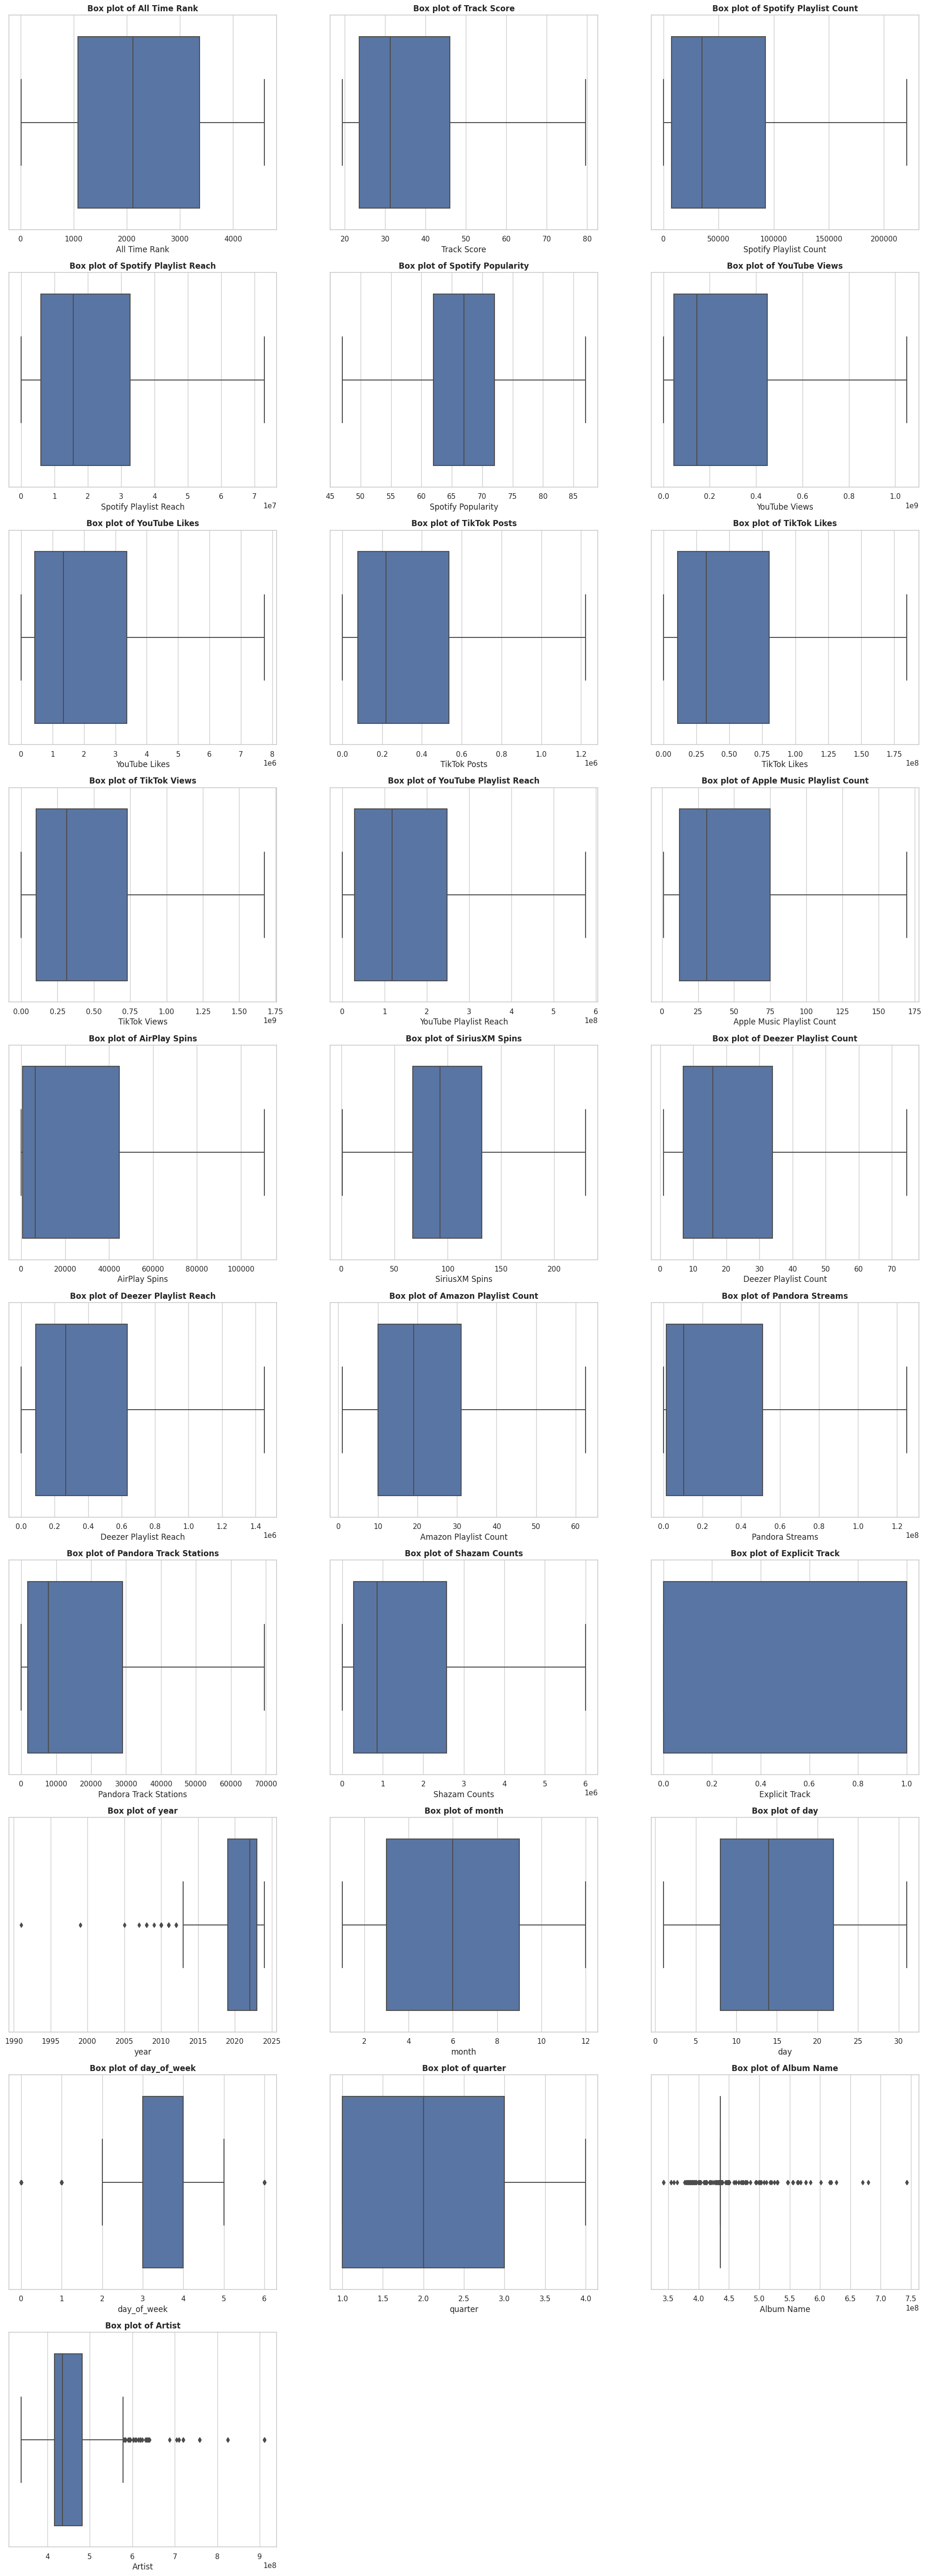

In [59]:
plt.figure(figsize=(25, 7*rows))

for index, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, index+1)
    sns.boxplot(x=X_valid[feature])
    plt.title(f"Box plot of {feature}", fontsize=12, fontweight='bold')

<Axes: xlabel='Spotify Streams'>

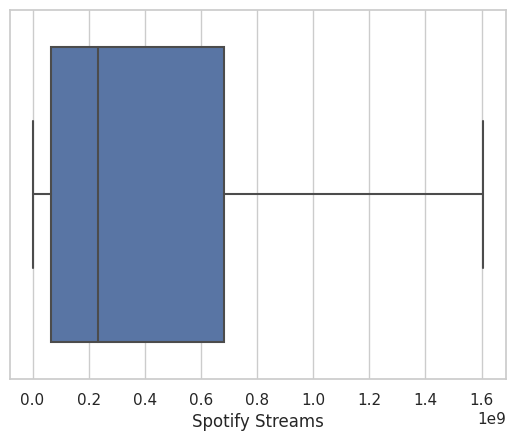

In [60]:
sns.boxplot(x=y_valid['Spotify Streams'])

## Scaling

In [61]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_final)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_train_scaled

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
0,0.600043,0.131769,0.053383,0.048755,0.400,0.102022,0.131018,0.149099,0.152877,0.163790,...,0.000257,0.029120,1.0,0.972973,0.636364,0.000000,0.166667,0.666667,0.083926,0.054679
1,0.939321,0.014440,0.321817,0.256908,0.675,0.026937,0.099408,0.200859,0.739952,0.547168,...,0.050308,0.113091,1.0,0.918919,0.909091,0.133333,0.666667,1.000000,0.137549,0.141151
2,0.989996,0.001805,0.312007,0.244804,0.275,0.256191,0.260285,0.130678,0.054698,0.061887,...,0.136044,0.226960,1.0,0.891892,0.000000,0.266667,0.500000,0.000000,0.168732,0.263002
3,0.925402,0.019856,0.733218,0.386615,0.825,0.047621,0.082327,0.012095,0.025566,0.023866,...,0.107155,0.167089,0.0,0.837838,0.909091,0.633333,0.166667,1.000000,0.192963,0.250023
4,0.043280,1.000000,0.952642,1.000000,0.700,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,0.837838,0.818182,0.100000,0.500000,1.000000,0.509788,0.343453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,0.786864,0.057762,0.277372,0.114614,0.375,0.336002,0.199555,0.032944,0.078481,0.074658,...,0.035429,0.086236,0.0,0.891892,1.000000,0.466667,0.166667,1.000000,0.115884,0.149966
3428,0.107873,0.895307,0.190881,0.260449,0.500,0.631675,1.000000,0.726013,1.000000,1.000000,...,0.103668,0.168149,1.0,0.945946,0.727273,0.500000,0.666667,0.666667,0.174641,0.235121
3429,0.708351,0.084838,0.148644,0.098611,0.400,0.487891,1.000000,0.735017,0.602305,0.610320,...,0.049745,0.023475,1.0,0.891892,0.454545,0.933333,0.000000,0.333333,0.123979,0.134695
3430,0.862766,0.036101,0.296770,0.145905,0.100,0.157815,0.193206,0.019736,0.052240,0.063107,...,0.121198,0.192173,0.0,0.918919,0.363636,0.433333,0.666667,0.333333,0.092176,0.236989


In [62]:
def scaled_data(data):
    '''
    Using MinMaxScaling to scale the data in the range 0 to 1.
    '''
    scaled_data = scaler.transform(data)
    scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
    return scaled_data

In [63]:
X_valid_scaled = scaled_data(X_valid)
X_valid_scaled

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
0,0.829491,0.045126,0.296493,0.121844,0.425,0.667651,0.790709,0.353850,0.101610,0.138479,...,0.191879,0.475227,1.0,0.837838,0.363636,0.333333,0.666667,0.333333,0.157917,0.215306
1,0.571335,0.146209,0.061531,0.623269,0.650,0.051706,0.030038,0.189670,0.000014,0.000014,...,0.000466,0.057969,0.0,0.972973,0.909091,0.233333,0.333333,1.000000,0.157917,0.119387
2,0.042627,1.086643,0.111029,1.075157,1.000,0.019721,0.031834,0.057975,0.134640,0.191924,...,0.098012,0.159620,0.0,1.000000,0.090909,0.400000,0.166667,0.000000,0.157917,0.169934
3,0.407351,0.256318,0.004474,0.390530,0.600,0.009279,0.028178,0.189670,0.194385,0.201708,...,0.124596,0.159620,0.0,1.000000,0.363636,0.900000,0.166667,0.333333,0.157917,0.086370
4,0.935624,0.016245,0.023523,0.018484,0.275,1.045979,0.515657,0.112435,0.016959,0.024993,...,0.124596,0.004108,1.0,0.729730,0.818182,0.200000,0.166667,1.000000,0.157917,0.169934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.672901,0.097473,0.011304,0.002344,0.100,0.068013,0.035989,1.051381,0.087330,0.331721,...,0.124596,0.007176,1.0,0.972973,0.090909,0.433333,0.166667,0.000000,0.157917,0.072400
817,0.036538,1.086643,0.337202,1.075157,0.925,0.050768,0.030923,0.185309,0.421440,0.377322,...,0.531147,0.309495,1.0,0.972973,0.636364,0.766667,0.500000,0.666667,0.157917,0.099411
818,0.326881,0.332130,0.257580,0.160457,0.550,0.044545,0.071336,0.189670,0.194385,0.201708,...,0.148352,0.120143,1.0,0.972973,0.454545,0.033333,0.666667,0.333333,0.088355,0.209287
819,0.522184,0.175090,0.295736,0.236212,0.450,1.045979,0.594954,0.071978,0.144667,0.095578,...,1.117735,1.067401,1.0,0.783784,0.454545,0.066667,0.666667,0.333333,0.157917,0.263002


In [64]:
target_scaler = MinMaxScaler()

y_train_scaled = target_scaler.fit_transform(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=y_train.columns)
y_train_scaled

,Spotify Streams
0,0.070933
1,0.248203
2,0.351288
3,0.431391
4,1.000000
...,...
3427,0.176580
3428,0.474019
3429,0.203343
3430,0.098207


In [65]:
def scale_target(data):
    scaler_data = target_scaler.transform(data)
    scaler_data = pd.DataFrame(scaler_data, columns=data.columns)
    return scaler_data

In [66]:
y_valid_scaled = scale_target(y_valid)
y_valid_scaled

,Spotify Streams
0,0.246091
1,0.060782
2,0.149914
3,0.008379
4,0.047124
...,...
816,0.011460
817,0.456324
818,0.144668
819,0.405170


In [67]:
X_train_final

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
2773,2760,26.7,11146.0,3.310108e+06,63.0,1.023631e+08,1045313.0,173337.0,2.543269e+07,2.545711e+08,...,17.0,157502.0,1,2023,8,1,1,3,3.919219e+08,3.699325e+08
4355,4320,20.2,67188.0,1.744213e+07,74.0,2.702763e+07,793123.0,233511.0,1.230983e+08,8.504394e+08,...,3132.0,611661.0,1,2021,11,5,4,4,4.237832e+08,4.194144e+08
4584,4553,19.5,65140.0,1.662032e+07,58.0,2.570453e+08,2076627.0,151922.0,9.099573e+06,9.618851e+07,...,8468.0,1227531.0,1,2020,1,9,3,1,4.423110e+08,4.891412e+08
4274,4256,20.5,153078.0,2.624826e+07,80.0,4.778061e+07,656845.0,14062.0,4.253139e+06,3.709417e+07,...,6670.0,903716.0,0,2018,11,20,1,4,4.567082e+08,4.817142e+08
199,200,74.8,198888.0,6.789244e+07,75.0,1.003334e+09,7978196.5,1162557.0,1.663599e+08,1.554257e+09,...,62238.0,5408578.5,0,2018,10,4,3,4,6.449572e+08,5.351779e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,3619,22.6,57909.0,7.781405e+06,62.0,3.371232e+08,1592106.0,38300.0,1.305609e+07,1.160382e+08,...,2206.0,466416.0,0,2020,12,15,1,4,4.109102e+08,4.244585e+08
499,497,69.0,39852.0,1.768250e+07,67.0,6.337817e+08,7978196.5,844032.0,1.663599e+08,1.554257e+09,...,6453.0,909449.0,1,2022,9,16,4,3,4.458218e+08,4.731868e+08
3268,3258,24.1,31034.0,6.694945e+06,63.0,4.895183e+08,7978196.5,854500.0,1.001995e+08,9.485941e+08,...,3097.0,126970.0,1,2020,6,29,0,2,4.157203e+08,4.157203e+08
3985,3968,21.4,61959.0,9.905843e+06,51.0,1.583415e+08,1541456.0,22945.0,8.690617e+06,9.808510e+07,...,7544.0,1039383.0,0,2021,5,14,4,2,3.968239e+08,4.742557e+08


In [68]:
y_train

,Spotify Streams
2773,9.798958e+07
4355,3.428725e+08
4584,4.852748e+08
4274,5.959306e+08
199,1.381416e+09
...,...
3638,2.439319e+08
499,6.548185e+08
3268,2.809020e+08
3985,1.356657e+08


In [69]:
X_valid

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
3826,3815,21.9,61901.0,8272313.0,64.0,6.698774e+08,6308434.0,411372.0,16903913.0,215231253.0,...,11943.0,2570303.0,1,2018,5,11,4,2,4.358849e+08,4.618482e+08
2634,2628,27.5,12847.0,42315256.0,73.0,5.187880e+07,239672.0,220503.0,2323.0,21053.0,...,30.0,313530.0,0,2023,11,8,2,4,4.358849e+08,4.069603e+08
196,197,79.6,23181.0,72995008.5,87.0,1.978747e+07,254004.0,67400.0,22398663.0,298300000.0,...,6101.0,863316.5,0,2024,2,13,1,1,4.358849e+08,4.358849e+08
1883,1874,33.6,935.0,26514018.0,71.0,9.310828e+06,224835.0,220503.0,32337952.0,313505897.0,...,7755.5,863316.5,0,2024,5,28,1,2,4.358849e+08,3.880673e+08
4326,4303,20.3,4912.0,1254932.0,58.0,1.049467e+09,4114023.0,130713.0,2821294.0,38845573.0,...,7755.5,22219.0,1,2014,10,7,1,4,4.358849e+08,4.358849e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,3095,24.8,2361.0,159112.0,51.0,6.824032e+07,287155.0,1222290.0,14528206.0,515579710.0,...,7755.5,38813.0,1,2023,2,14,1,1,4.358849e+08,3.800732e+08
168,169,79.6,70400.0,72995008.5,84.0,5.093857e+07,246731.0,215433.0,70110809.0,586454750.0,...,33058.0,1673932.0,1,2023,8,24,3,3,4.358849e+08,3.955295e+08
1516,1504,37.8,53777.0,10893828.0,69.0,4.469480e+07,569158.0,220503.0,32337952.0,313505897.0,...,9234.0,649807.0,1,2023,6,2,4,2,3.945533e+08,4.584039e+08
2407,2402,29.1,61743.0,16037041.0,65.0,1.049467e+09,4746667.0,83679.0,24066770.0,148552468.0,...,69565.5,5773120.0,1,2016,6,3,4,2,4.358849e+08,4.891412e+08


In [70]:
y_valid

,Spotify Streams
3826,339954855.0
2634,83966111.0
196,207093873.0
1883,11576361.0
4326,65098757.0
...,...
3120,15832405.0
168,630373315.0
1516,199846893.0
2407,559708419.0


In [71]:
X_train_scaled

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
0,0.600043,0.131769,0.053383,0.048755,0.400,0.102022,0.131018,0.149099,0.152877,0.163790,...,0.000257,0.029120,1.0,0.972973,0.636364,0.000000,0.166667,0.666667,0.083926,0.054679
1,0.939321,0.014440,0.321817,0.256908,0.675,0.026937,0.099408,0.200859,0.739952,0.547168,...,0.050308,0.113091,1.0,0.918919,0.909091,0.133333,0.666667,1.000000,0.137549,0.141151
2,0.989996,0.001805,0.312007,0.244804,0.275,0.256191,0.260285,0.130678,0.054698,0.061887,...,0.136044,0.226960,1.0,0.891892,0.000000,0.266667,0.500000,0.000000,0.168732,0.263002
3,0.925402,0.019856,0.733218,0.386615,0.825,0.047621,0.082327,0.012095,0.025566,0.023866,...,0.107155,0.167089,0.0,0.837838,0.909091,0.633333,0.166667,1.000000,0.192963,0.250023
4,0.043280,1.000000,0.952642,1.000000,0.700,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,0.837838,0.818182,0.100000,0.500000,1.000000,0.509788,0.343453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,0.786864,0.057762,0.277372,0.114614,0.375,0.336002,0.199555,0.032944,0.078481,0.074658,...,0.035429,0.086236,0.0,0.891892,1.000000,0.466667,0.166667,1.000000,0.115884,0.149966
3428,0.107873,0.895307,0.190881,0.260449,0.500,0.631675,1.000000,0.726013,1.000000,1.000000,...,0.103668,0.168149,1.0,0.945946,0.727273,0.500000,0.666667,0.666667,0.174641,0.235121
3429,0.708351,0.084838,0.148644,0.098611,0.400,0.487891,1.000000,0.735017,0.602305,0.610320,...,0.049745,0.023475,1.0,0.891892,0.454545,0.933333,0.000000,0.333333,0.123979,0.134695
3430,0.862766,0.036101,0.296770,0.145905,0.100,0.157815,0.193206,0.019736,0.052240,0.063107,...,0.121198,0.192173,0.0,0.918919,0.363636,0.433333,0.666667,0.333333,0.092176,0.236989


In [72]:
y_train_scaled

,Spotify Streams
0,0.070933
1,0.248203
2,0.351288
3,0.431391
4,1.000000
...,...
3427,0.176580
3428,0.474019
3429,0.203343
3430,0.098207


In [73]:
X_valid_scaled

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
0,0.829491,0.045126,0.296493,0.121844,0.425,0.667651,0.790709,0.353850,0.101610,0.138479,...,0.191879,0.475227,1.0,0.837838,0.363636,0.333333,0.666667,0.333333,0.157917,0.215306
1,0.571335,0.146209,0.061531,0.623269,0.650,0.051706,0.030038,0.189670,0.000014,0.000014,...,0.000466,0.057969,0.0,0.972973,0.909091,0.233333,0.333333,1.000000,0.157917,0.119387
2,0.042627,1.086643,0.111029,1.075157,1.000,0.019721,0.031834,0.057975,0.134640,0.191924,...,0.098012,0.159620,0.0,1.000000,0.090909,0.400000,0.166667,0.000000,0.157917,0.169934
3,0.407351,0.256318,0.004474,0.390530,0.600,0.009279,0.028178,0.189670,0.194385,0.201708,...,0.124596,0.159620,0.0,1.000000,0.363636,0.900000,0.166667,0.333333,0.157917,0.086370
4,0.935624,0.016245,0.023523,0.018484,0.275,1.045979,0.515657,0.112435,0.016959,0.024993,...,0.124596,0.004108,1.0,0.729730,0.818182,0.200000,0.166667,1.000000,0.157917,0.169934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,0.672901,0.097473,0.011304,0.002344,0.100,0.068013,0.035989,1.051381,0.087330,0.331721,...,0.124596,0.007176,1.0,0.972973,0.090909,0.433333,0.166667,0.000000,0.157917,0.072400
817,0.036538,1.086643,0.337202,1.075157,0.925,0.050768,0.030923,0.185309,0.421440,0.377322,...,0.531147,0.309495,1.0,0.972973,0.636364,0.766667,0.500000,0.666667,0.157917,0.099411
818,0.326881,0.332130,0.257580,0.160457,0.550,0.044545,0.071336,0.189670,0.194385,0.201708,...,0.148352,0.120143,1.0,0.972973,0.454545,0.033333,0.666667,0.333333,0.088355,0.209287
819,0.522184,0.175090,0.295736,0.236212,0.450,1.045979,0.594954,0.071978,0.144667,0.095578,...,1.117735,1.067401,1.0,0.783784,0.454545,0.066667,0.666667,0.333333,0.157917,0.263002


In [74]:
y_valid_scaled

,Spotify Streams
0,0.246091
1,0.060782
2,0.149914
3,0.008379
4,0.047124
...,...
816,0.011460
817,0.456324
818,0.144668
819,0.405170


## Modelling

In [75]:
algorithms = {
    'Decision Trees': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'XGBoost Regression': XGBRegressor(),
    'LightGBM Regression': LGBMRegressor(),
    'CatBoost Regression': CatBoostRegressor(verbose=False),
    'AdaBoost Regression': AdaBoostRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Support Vector Regression": SVR()
}

algo_MSE = {}

In [76]:
for model_name, model in algorithms.items():
    np.random.seed(42)
    fitting = model.fit(X_train_scaled, y_train_scaled)
    pred = fitting.predict(X_valid_scaled)
    algo_MSE[model_name] = mean_squared_error(y_valid_scaled, pred)
    
    print(f"{model_name}: {algo_MSE[model_name]}\n")

Decision Trees: 0.08880924952151556

Random Forest: 0.0758309719418125

Gradient Boosting Regression: 0.07461509210817517

XGBoost Regression: 0.06850099010847549

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4852
[LightGBM] [Info] Number of data points in the train set: 3432, number of used features: 28
[LightGBM] [Info] Start training from score 0.291207
LightGBM Regression: 0.06807595148312696

CatBoost Regression: 0.06015226987509956

AdaBoost Regression: 0.05982274293774961

Linear Regression: 0.03532299269529538

Ridge Regression: 0.033039993146872865

Lasso Regression: 0.11269958590781871

Elastic Net: 0.11269958590781871

Support Vector Regression: 0.02671663862089966



In [77]:
algo_MSE

{'Decision Trees': 0.08880924952151556,
 'Random Forest': 0.0758309719418125,
 'Gradient Boosting Regression': 0.07461509210817517,
 'XGBoost Regression': 0.06850099010847549,
 'LightGBM Regression': 0.06807595148312696,
 'CatBoost Regression': 0.06015226987509956,
 'AdaBoost Regression': 0.05982274293774961,
 'Linear Regression': 0.03532299269529538,
 'Ridge Regression': 0.033039993146872865,
 'Lasso Regression': 0.11269958590781871,
 'Elastic Net': 0.11269958590781871,
 'Support Vector Regression': 0.02671663862089966}

### Model Performance Analysis

**Lowest MSE (Best Performance):**
- **Support Vector Regression (SVR):** `0.027`
  - **Why:** Handles non-linear relationships well and is robust to overfitting.

**Other Top Performers:**
- **Linear Regression:** `0.035`
- **Ridge Regression:** `0.033`
- **AdaBoost Regression:** `0.060`
  - **Why:** 
    - **Linear/Ridge Regression:** Effective for linear or slightly complex relationships.
    - **AdaBoost:** Focuses on residuals to capture complex patterns.

**Less Effective Models:**
- **Lasso Regression:** `0.113`
- **Elastic Net:** `0.113`
  - **Why:** Higher MSE due to possibly less effective handling of feature relationships or regularization issues.

**Conclusion:**
- **SVR** performed the best due to its ability to manage non-linear relationships and robustness against overfitting.
- **Linear** and **Ridge Regression** were also effective for linear or mildly complex data.
- **Lesser the MSE** indicates **smaller the error** and hence a **better estimator**.


## Real-Time Prediction

In [78]:
X_test_final = X_test.copy()

labelencode_explicitrack(le, X_test_final)
convert_to_numeric(X_test_final)
mean_median_conversion(X_test_final)
X_test_final = apply_transform_encoding(X_test_final, encoder)
X_test_final = cap_outliers(X_test_final, outlier_features)
X_test_scaled = scaled_data(X_test_final)

In [79]:
X_test_scaled

,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Album Name,Artist
0,0.503915,0.185921,0.292814,1.033043,0.7250,0.022448,0.030292,0.007907,0.105901,0.168867,...,0.013995,0.331922,1.0,0.945946,0.454545,0.533333,0.666667,0.333333,0.157917,0.085775
1,0.422793,0.240072,0.002419,0.000975,-0.0375,0.122442,0.135684,0.130194,0.150404,0.171825,...,1.666967,0.176664,1.0,0.891892,0.727273,0.800000,0.666667,0.666667,0.157917,0.169934
2,0.915398,0.021661,0.297192,0.257670,0.5000,0.002792,0.004266,0.027650,0.006875,0.007583,...,1.666967,0.497409,1.0,0.675676,0.000000,0.000000,1.000000,0.000000,0.157917,0.169934
3,0.110483,0.880866,0.399709,0.597447,0.5250,0.237576,0.334811,0.414452,0.886580,0.805586,...,0.357778,0.641657,0.0,0.945946,0.363636,0.166667,0.666667,0.333333,0.157917,0.379610
4,0.480426,0.198556,0.377542,0.419269,0.6000,0.792736,0.560313,0.540135,0.148435,0.194499,...,1.666967,0.898367,1.0,0.702703,0.545455,0.733333,0.166667,0.666667,0.157917,0.169934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.884732,0.030686,0.362713,0.218965,0.6500,0.043950,0.083273,0.180298,0.238310,0.193376,...,0.216559,0.052646,1.0,0.918919,0.636364,0.866667,0.666667,0.666667,0.157917,0.119610
88,0.527838,0.171480,0.785816,1.033043,0.7500,0.463302,0.362405,0.056568,0.314155,0.268473,...,1.666967,0.954566,1.0,0.729730,0.000000,0.000000,0.333333,0.000000,0.157917,0.418442
89,0.360592,0.297834,0.147518,0.287786,0.5750,0.082816,0.114262,0.373316,0.886580,0.805586,...,0.298151,0.134397,0.0,0.972973,0.000000,0.633333,0.666667,0.000000,0.157917,0.072447
90,0.947803,0.012635,0.814742,0.674211,0.6750,0.128101,0.172188,0.063632,0.215385,0.174784,...,1.666967,0.954566,0.0,0.648649,1.000000,0.600000,0.000000,1.000000,0.157917,0.169934


In [80]:
np.random.seed(42)
svr = SVR()
fitting = svr.fit(X_train_scaled, y_train_scaled)
prediction_result = fitting.predict(X_test_scaled)
prediction_result = pd.DataFrame(prediction_result, columns=y_train.columns)
prediction_result

,Spotify Streams
0,0.314156
1,0.432566
2,0.447130
3,0.395923
4,0.511427
...,...
87,0.232729
88,0.599138
89,0.229477
90,0.572332


In [81]:
# Inverse transform to get predictions in the original scale
predictions_original_result = target_scaler.inverse_transform(prediction_result)
predictions_original_result = pd.DataFrame(predictions_original_result, columns=['Predicted Spotify Streams'])
predictions_original_result['Predicted Spotify Streams'] = predictions_original_result['Predicted Spotify Streams'].astype(int)
predictions_original_result['Predicted Spotify Streams'] = predictions_original_result['Predicted Spotify Streams'].apply(lambda x: '{:,}'.format(x))
predictions_original_result

,Predicted Spotify Streams
0,"433,981,358"
1,"597,553,470"
2,"617,673,478"
3,"546,935,387"
4,"706,493,394"
...,...
87,"321,496,409"
88,"827,659,657"
89,"317,004,391"
90,"790,628,832"


In [82]:
y_test = pd.DataFrame(y_test, columns=y_train.columns)

result_two = pd.concat([X_test, y_test], axis=1)
result_two.reset_index(drop=True, inplace=True)

# Combine the DataFrames
result = pd.concat([result_two, predictions_original_result], axis=1)

result

,Album Name,Artist,All Time Rank,Track Score,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Pandora Track Stations,Shazam Counts,Explicit Track,year,month,day,day_of_week,quarter,Spotify Streams,Predicted Spotify Streams
0,Deep Down (feat. Never Dull),Alok,"2,318",29.7,"61,133","99,451,251",76.0,"22,524,199","241,700","9,193",...,872,"1,795,229",non-explicit,2022,6,17,4,2,"335,203,899","433,981,358"
1,Gangsta's Paradise (25th Anniversary - Remaste...,Coolio,"1,945",32.7,506,"66,189",25.0,NaN,NaN,NaN,...,"334,159",NaN,non-explicit,2020,9,25,4,3,"1,675,750,095","597,553,470"
2,Here's To The Good Times,Florida Georgia Line,"4,210",20.6,"62,047","17,493,880",67.0,"2,801,769","34,063","32,146",...,"1,027,366","2,690,275",non-explicit,2012,1,1,6,1,"455,780,340","617,673,478"
3,Vegas (From the Original Motion Picture Soundt...,Doja Cat,509,68.2,"83,450","40,562,156",68.0,"238,368,386","2,671,201","481,825",...,"22,268","3,470,453",explicit,2022,5,6,4,2,"553,783,547","546,935,387"
4,3,Marc Anthony,"2,210",30.4,"78,822","28,465,181",71.0,"1,398,550,208","4,470,299","722,663",...,"384,522","4,858,889",non-explicit,2013,7,23,1,3,"618,671,056","706,493,394"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,We Love You Tecca 2,Lil Tecca,"4,069",21.1,"75,726","14,866,086",73.0,"44,097,619","664,394","209,608",...,"13,479","284,740",non-explicit,2021,8,27,4,3,"318,061,543","321,496,409"
88,In The Lonely Hour (Deluxe),Sam Smith,"2,428",28.9,"164,059","76,679,523",77.0,"464,847,219","2,891,357","65,764",...,"191,798","15,809,409",non-explicit,2014,1,1,2,1,"1,879,966,374","827,659,657"
89,Like..? Deluxe (Apple Music Edition),Ice Spice,"1,659",35.9,"30,799","19,538,464",70.0,"83,093,258","911,630","434,002",...,"18,557","726,899",explicit,2023,1,20,4,1,"190,497,384","317,004,391"
90,Everybody Talks,Neon Trees,"4,359",20.1,"170,098","45,773,811",74.0,"128,528,493","1,373,771","73,977",...,"391,142","5,673,327",explicit,2011,12,19,0,4,"836,267,192","790,628,832"
